In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline
import warnings
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import classification_report
#import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile


In [32]:
df = pd.read_csv("BotNeTIoT-L01_label_NoDuplicates.csv")
df

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.000000,98.0,0.000000e+00,98.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,1,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,1.348699e-06,...,7.263102e+08,5.662344e+17,1.931640,98.0,1.348699e-06,138.592929,1.818989e-12,0.000000e+00,0.000000e+00,0
2,2,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.000000,66.0,0.000000e+00,114.856432,0.000000e+00,0.000000e+00,0.000000e+00,0
3,3,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,0.000000e+00,...,1.505914e+09,0.000000e+00,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
4,4,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,9.536743e-07,...,7.529571e+08,5.669445e+17,1.000000,74.0,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426569,7062071,2.801727,294.039965,8.416085e+03,2.801727,294.039965,8.416085e+03,1.214290,330.0,3.810000e-06,...,2.502478e+01,2.384770e-04,1.214290,330.0,3.810000e-06,431.490440,2.060000e-11,-8.860000e-49,-6.090000e-38,1
2426570,7062072,2.979945,215.501627,1.780468e+04,2.979945,215.501627,1.780468e+04,1.252204,60.0,0.000000e+00,...,2.399763e+01,1.446291e+01,1.252204,60.0,0.000000e+00,84.852814,0.000000e+00,-1.110000e-32,0.000000e+00,1
2426571,7062073,1.743927,281.157094,1.080196e+04,1.743927,281.157094,1.080196e+04,1.214226,330.0,0.000000e+00,...,2.502834e+01,4.480000e-05,1.214226,330.0,0.000000e+00,431.490440,2.910000e-11,-1.430000e-28,0.000000e+00,1
2426572,7062074,2.743925,298.957472,7.417844e+03,2.743925,298.957472,7.417844e+03,1.214226,330.0,6.610000e-06,...,2.502833e+01,4.480000e-05,1.214226,330.0,6.610000e-06,431.490440,4.370000e-11,-5.120000e-51,0.000000e+00,1


In [33]:
import pandas as pd


sample_size = 20000
sample_df = df.sample(n=sample_size)

# Create df2 by removing the rows in sample_df from df1
df = df.drop(sample_df.index)

# Save the sample DataFrame as a CSV file
sample_df.to_csv('testing.csv', index=False) 


In [34]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Unnamed: 0
False    2406574
Name: Unnamed: 0, dtype: int64

MI_dir_L0.1_weight
False    2406574
Name: MI_dir_L0.1_weight, dtype: int64

MI_dir_L0.1_mean
False    2406574
Name: MI_dir_L0.1_mean, dtype: int64

MI_dir_L0.1_variance
False    2406574
Name: MI_dir_L0.1_variance, dtype: int64

H_L0.1_weight
False    2406574
Name: H_L0.1_weight, dtype: int64

H_L0.1_mean
False    2406574
Name: H_L0.1_mean, dtype: int64

H_L0.1_variance
False    2406574
Name: H_L0.1_variance, dtype: int64

HH_L0.1_weight
False    2406574
Name: HH_L0.1_weight, dtype: int64

HH_L0.1_mean
False    2406574
Name: HH_L0.1_mean, dtype: int64

HH_L0.1_std
False    2406574
Name: HH_L0.1_std, dtype: int64

HH_L0.1_magnitude
False    2406574
Name: HH_L0.1_magnitude, dtype: int64

HH_L0.1_radius
False    2406574
Name: HH_L0.1_radius, dtype: int64

HH_L0.1_covariance
False    2406574
Name: HH_L0.1_covariance, dtype: int64

HH_L0.1_pcc
False    2406574
Name: HH_L0.1_pcc, dtype: int64

HH_jit_L0.1_weight
False    2406574
Name

In [35]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder()
d = df.select_dtypes(include=['object'])
for i in d.columns:
    df[i]=label_enco.fit_transform(df[i])

In [36]:
Y=df['label']
del df['label']
X=df

In [37]:
mi = mutual_info_classif(X, Y) 
len(mi)

24

In [38]:
mi = pd.Series(mi)
mi.index = X.columns

In [39]:
mi.sort_values(ascending=False, inplace = True)

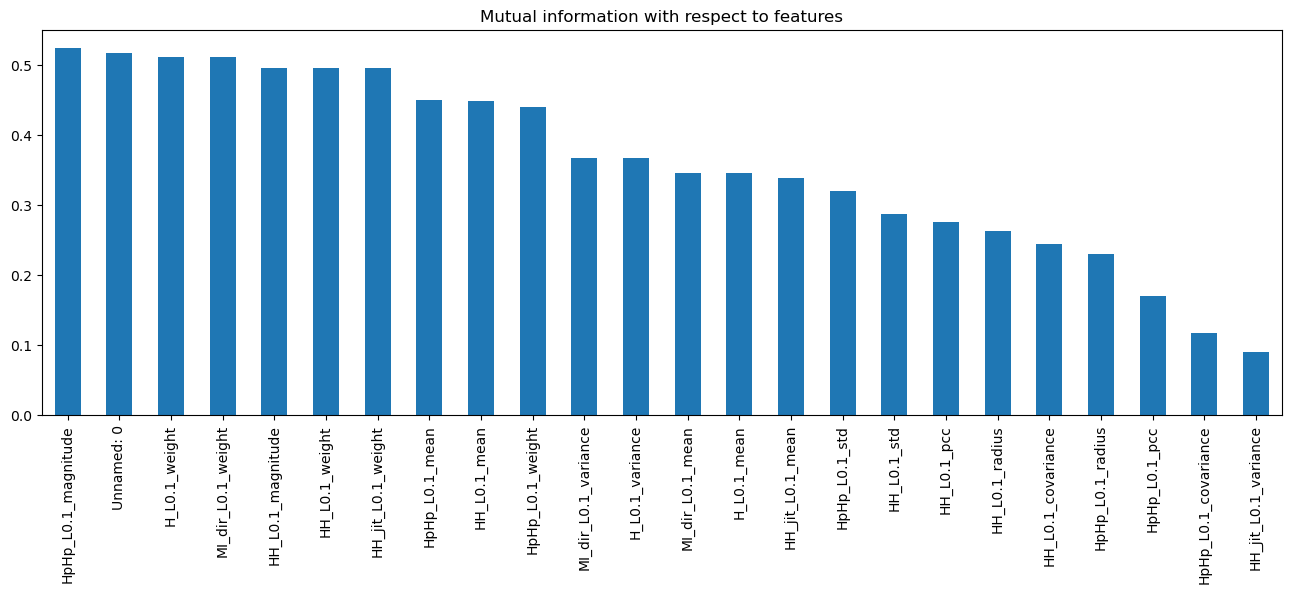

In [40]:
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,5))
plt.show()

In [41]:
sel = SelectPercentile(mutual_info_classif, percentile=60).fit(X, Y)
feature=X.columns[sel.get_support()]

In [42]:
X.columns[sel.get_support()]
X = sel.transform(X)

In [43]:
df1=pd.DataFrame(X,columns=feature)
df1

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_magnitude,HH_jit_L0.1_weight,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_magnitude
0,0.0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,98.000000,1.000000,1.000000,98.0,98.000000
1,1.0,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,138.592929,1.931640,1.931640,98.0,138.592929
2,2.0,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,114.856432,1.000000,1.000000,66.0,114.856432
3,3.0,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,74.000000,1.000000,1.000000,74.0,74.000000
4,4.0,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,74.000000,2.000000,1.000000,74.0,74.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406569,7062071.0,2.801727,294.039965,8.416085e+03,2.801727,294.039965,8.416085e+03,1.214290,330.0,431.490440,1.214290,1.214290,330.0,431.490440
2406570,7062072.0,2.979945,215.501627,1.780468e+04,2.979945,215.501627,1.780468e+04,1.252204,60.0,84.852814,1.252204,1.252204,60.0,84.852814
2406571,7062073.0,1.743927,281.157094,1.080196e+04,1.743927,281.157094,1.080196e+04,1.214226,330.0,431.490440,1.214226,1.214226,330.0,431.490440
2406572,7062074.0,2.743925,298.957472,7.417844e+03,2.743925,298.957472,7.417844e+03,1.214226,330.0,431.490440,1.214226,1.214226,330.0,431.490440


In [44]:
X=df1
X

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_magnitude,HH_jit_L0.1_weight,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_magnitude
0,0.0,1.000000,98.000000,0.000000e+00,1.000000,98.000000,0.000000e+00,1.000000,98.0,98.000000,1.000000,1.000000,98.0,98.000000
1,1.0,1.931640,98.000000,1.818989e-12,1.931640,98.000000,1.818989e-12,1.931640,98.0,138.592929,1.931640,1.931640,98.0,138.592929
2,2.0,2.904273,86.981750,2.311822e+02,2.904273,86.981750,2.311822e+02,1.000000,66.0,114.856432,1.000000,1.000000,66.0,114.856432
3,3.0,3.902546,83.655268,2.040614e+02,3.902546,83.655268,2.040614e+02,1.000000,74.0,74.000000,1.000000,1.000000,74.0,74.000000
4,4.0,4.902545,81.685828,1.775746e+02,4.902545,81.685828,1.775746e+02,2.000000,74.0,74.000000,2.000000,1.000000,74.0,74.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406569,7062071.0,2.801727,294.039965,8.416085e+03,2.801727,294.039965,8.416085e+03,1.214290,330.0,431.490440,1.214290,1.214290,330.0,431.490440
2406570,7062072.0,2.979945,215.501627,1.780468e+04,2.979945,215.501627,1.780468e+04,1.252204,60.0,84.852814,1.252204,1.252204,60.0,84.852814
2406571,7062073.0,1.743927,281.157094,1.080196e+04,1.743927,281.157094,1.080196e+04,1.214226,330.0,431.490440,1.214226,1.214226,330.0,431.490440
2406572,7062074.0,2.743925,298.957472,7.417844e+03,2.743925,298.957472,7.417844e+03,1.214226,330.0,431.490440,1.214226,1.214226,330.0,431.490440


In [45]:
Y1=Y
Y1

0          0
1          0
2          0
3          0
4          0
          ..
2426569    1
2426570    1
2426571    1
2426572    1
2426573    1
Name: label, Length: 2406574, dtype: int64

In [46]:
df2 = pd.read_csv("testing.csv")
df2

,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_std,...,HH_jit_L0.1_mean,HH_jit_L0.1_variance,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,label
0,1387340,5940.998448,436.766402,48665.465630,5940.998448,436.766402,48665.465630,4424.013135,565.889029,7.492609,...,5.946198e-03,4.023843e+06,1.000000,566.000000,0.000000,566.000000,0.000000,0.000000,0.000000,0
1,738890,6435.189277,380.247592,55638.415282,6435.189277,380.247592,55638.415282,1.000000,60.000000,0.000000,...,1.507656e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0
2,6922027,6.537800,70.561583,48.956585,6.537800,70.561583,48.956585,3.563828,71.755223,3.594328,...,4.410758e+01,6.605612e+03,3.563825,71.755221,3.594329,103.076727,12.919200,0.000000,0.000000,1
3,6736646,9.335746,68.041634,156.703941,9.335746,68.041634,156.703941,7.869660,67.756599,13.246753,...,2.123806e+00,4.804788e+00,2.136978,66.002118,0.624916,120.391233,103.715582,1.269091,0.199412,1
4,1289078,5872.626210,439.134480,48096.888811,5872.626210,439.134480,48096.888811,1.000000,60.000000,0.000000,...,1.507659e+09,0.000000e+00,1.000000,60.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1380702,5755.945973,425.961515,51193.055128,5755.945973,425.961515,51193.055128,4162.209701,565.932613,5.838940,...,1.203191e-02,1.284485e+07,1.000000,566.000000,0.000000,566.000000,0.000000,0.000000,0.000000,0
19996,12791,5711.784409,74.710283,521.989247,5711.784409,74.710283,521.989247,5689.705465,73.998942,0.121673,...,4.018113e+04,6.050772e+13,1.000000,74.000000,0.000000,74.000000,0.000000,0.000000,0.000000,0
19997,6596314,1.312660,87.637231,65.300394,1.312660,87.637231,65.300394,1.073446,89.896945,1.755289,...,3.988466e+01,1.277611e+01,1.072666,89.896870,1.755925,108.137196,3.089304,-0.002247,-0.002913,1
19998,784144,6394.838257,384.134127,55054.478670,6394.838257,384.134127,55054.478670,4196.053297,553.968287,3.957907,...,3.504189e-03,9.371098e+04,1.000000,554.000000,0.000000,554.000000,0.000000,0.000000,0.000000,0


In [47]:
Y2=df2['label']

In [48]:
import pandas as pd

# Get a list of column names in X1
columns_to_select = X.columns.tolist()
# Select only the columns from X2 that are present in X1
df2 = df2[columns_to_select]
df2


,Unnamed: 0,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,HH_L0.1_weight,HH_L0.1_mean,HH_L0.1_magnitude,HH_jit_L0.1_weight,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_magnitude
0,1387340,5940.998448,436.766402,48665.465630,5940.998448,436.766402,48665.465630,4424.013135,565.889029,565.889029,4424.013135,1.000000,566.000000,566.000000
1,738890,6435.189277,380.247592,55638.415282,6435.189277,380.247592,55638.415282,1.000000,60.000000,60.000000,1.000000,1.000000,60.000000,60.000000
2,6922027,6.537800,70.561583,48.956585,6.537800,70.561583,48.956585,3.563828,71.755223,103.076729,3.563828,3.563825,71.755221,103.076727
3,6736646,9.335746,68.041634,156.703941,9.335746,68.041634,156.703941,7.869660,67.756599,115.032473,7.869660,2.136978,66.002118,120.391233
4,1289078,5872.626210,439.134480,48096.888811,5872.626210,439.134480,48096.888811,1.000000,60.000000,60.000000,1.000000,1.000000,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1380702,5755.945973,425.961515,51193.055128,5755.945973,425.961515,51193.055128,4162.209701,565.932613,565.932613,4162.209701,1.000000,566.000000,566.000000
19996,12791,5711.784409,74.710283,521.989247,5711.784409,74.710283,521.989247,5689.705465,73.998942,95.267221,5689.705465,1.000000,74.000000,74.000000
19997,6596314,1.312660,87.637231,65.300394,1.312660,87.637231,65.300394,1.073446,89.896945,108.136659,1.073446,1.072666,89.896870,108.137196
19998,784144,6394.838257,384.134127,55054.478670,6394.838257,384.134127,55054.478670,4196.053297,553.968287,553.968287,4196.053297,1.000000,554.000000,554.000000


In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, RNN, LSTM, Dropout, GRU, Bidirectional, Activation
import math
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Assuming you have df1 and df2 as your dataframes, and Y1 and Y2 as corresponding target variables
# Split the data into training and testing sets

# Train-Test Split for df1
"""x_train, x_test, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=0)

# Build and train your neural network model
annmodel = tf.keras.models.Sequential()
annmodel.add(tf.keras.layers.Dense(units=6, activation="relu"))
annmodel.add(tf.keras.layers.Dense(units=6, activation="relu"))
annmodel.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
annmodel.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])
history = annmodel.fit(x_train, y_train, epochs=6, batch_size=1024, validation_split=0.1, verbose=0)

# Test your model on df2
x_test_df2 = df2  # Assuming df2 has the same columns as df1
y_test_df2 = Y2  # Assuming Y2 is the target variable for df2

evaluation_results = annmodel.evaluate(x_test_df2, y_test_df2, verbose=0)

# Results
accuracy = evaluation_results[1]
P = evaluation_results[2]
R = evaluation_results[3]
F = (2 * P * R) / (P + R)
print('Neural Network Model Results:')
print('Test Accuracy: {:.5f}%'.format(accuracy * 100))
print('Test Precision: {:.5f}'.format(P))
print('Test Recall: {:.5f}'.format(R))
print('Test F score: {:.5f}'.format(F))

# Confusion Matrix
y_probs = annmodel.predict(x_test_df2)
y_pred = (y_probs > 0.5).astype(int).flatten()
cm = confusion_matrix(y_test_df2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_df2, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test_df2, y_probs):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Model Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Model Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()"""


'x_train, x_test, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=0)\n\n# Build and train your neural network model\nannmodel = tf.keras.models.Sequential()\nannmodel.add(tf.keras.layers.Dense(units=6, activation="relu"))\nannmodel.add(tf.keras.layers.Dense(units=6, activation="relu"))\nannmodel.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))\nannmodel.compile(optimizer="adam", loss="binary_crossentropy", metrics=[\'accuracy\', tf.keras.metrics.Precision(name=\'precision\'), tf.keras.metrics.Recall(name=\'recall\')])\nhistory = annmodel.fit(x_train, y_train, epochs=6, batch_size=1024, validation_split=0.1, verbose=0)\n\n# Test your model on df2\nx_test_df2 = df2  # Assuming df2 has the same columns as df1\ny_test_df2 = Y2  # Assuming Y2 is the target variable for df2\n\nevaluation_results = annmodel.evaluate(x_test_df2, y_test_df2, verbose=0)\n\n# Results\naccuracy = evaluation_results[1]\nP = evaluation_results[2]\nR = evaluation_results[3]\nF = (2 * 

In [50]:
"""# Plotting Neural Network Loss and Accuracy
# Assuming you have an annmodel trained and history variable available:
history = annmodel.fit(x_train, y_train, epochs=6, batch_size=1024, validation_split=0.1, verbose=0)

# Model Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Model Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()"""

"# Plotting Neural Network Loss and Accuracy\n# Assuming you have an annmodel trained and history variable available:\nhistory = annmodel.fit(x_train, y_train, epochs=6, batch_size=1024, validation_split=0.1, verbose=0)\n\n# Model Loss\nplt.figure(figsize=(8,6))\nplt.plot(history.history['loss'], label='Train Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.title('Model Loss')\nplt.ylabel('Loss')\nplt.xlabel('Epochs')\nplt.legend()\nplt.show()\n\n# Model Accuracy\nplt.figure(figsize=(8,6))\nplt.plot(history.history['accuracy'], label='Train Accuracy')\nplt.plot(history.history['val_accuracy'], label='Validation Accuracy')\nplt.title('Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epochs')\nplt.legend()\nplt.show()"

# Gradient Boosting Classifier

Gradient Boosting Classifier Results:
Test Accuracy: 100.00000%
Test Precision: 1.00000
Test Recall: 1.00000
Test F score: 1.00000



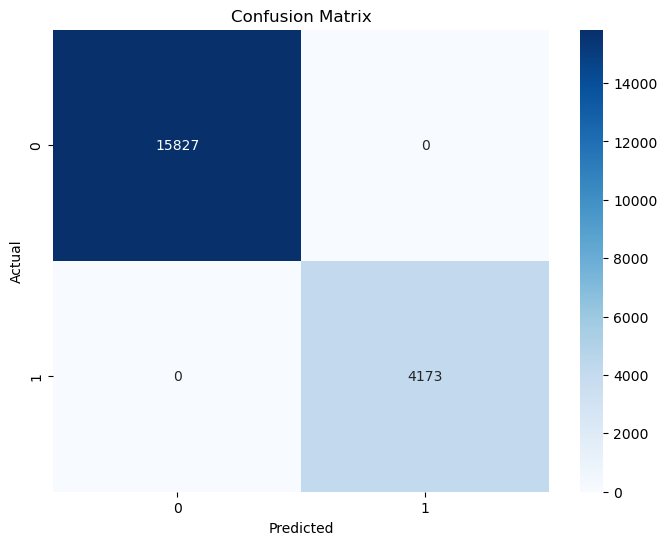

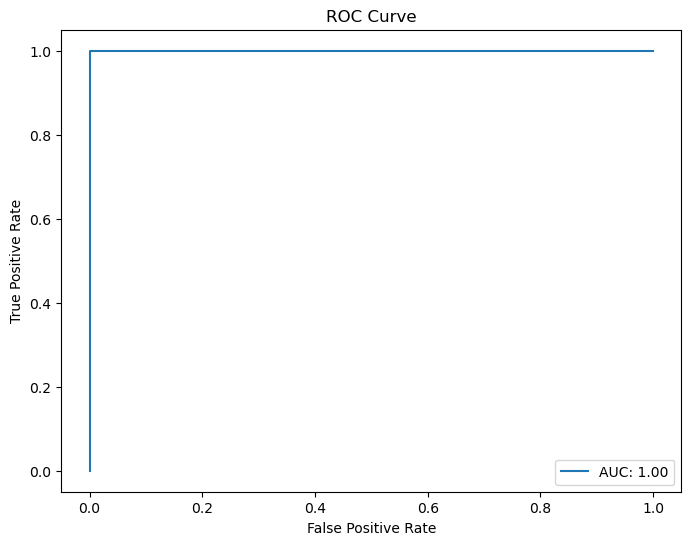

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have df1 and df2 as your DataFrames, and Y1 and Y2 as corresponding target variables
# Ensure that df1 and df2 have the same columns before proceeding

# Train-Test Split for df1
x_train, x_test, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Classifier
gb = GradientBoostingClassifier(
    n_estimators=40,
    learning_rate=0.04,
    max_depth=4,
    random_state=42
)
gb.fit(x_train, y_train)

# Test the model on df2
y_pred = gb.predict(df2)

# Calculate metrics
accuracy = accuracy_score(Y2, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y2, y_pred, average='binary')

print('Gradient Boosting Classifier Results:')
print('Test Accuracy: {:.5f}%'.format(accuracy * 100))
print('Test Precision: {:.5f}'.format(precision))
print('Test Recall: {:.5f}'.format(recall))
print('Test F score: {:.5f}\n'.format(f1_score))

# Plotting Confusion Matrix
cm = confusion_matrix(Y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting ROC Curve
# Calculate predicted probabilities for df2 using predict_proba
y_probs = gb.predict_proba(df2)[:, 1]

fpr, tpr, thresholds = roc_curve(Y2, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(Y2, y_probs):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Deceision Tree Classifier

Decision Tree Classifier Results:
Test Accuracy: 99.99440%
Test Precision: 0.99986
Test Recall: 0.99988
Test F score: 0.99987



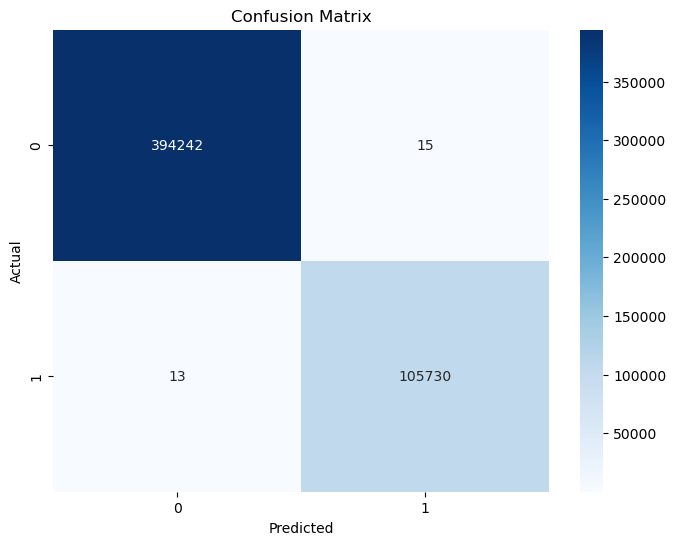

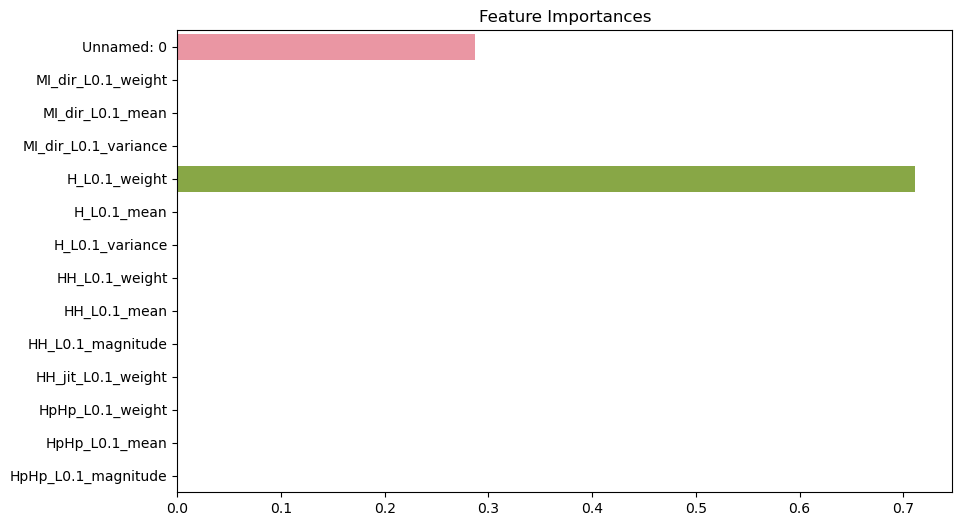

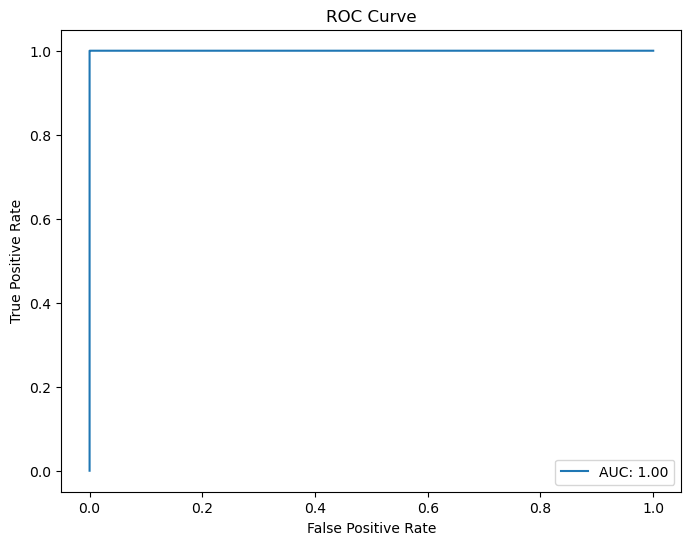

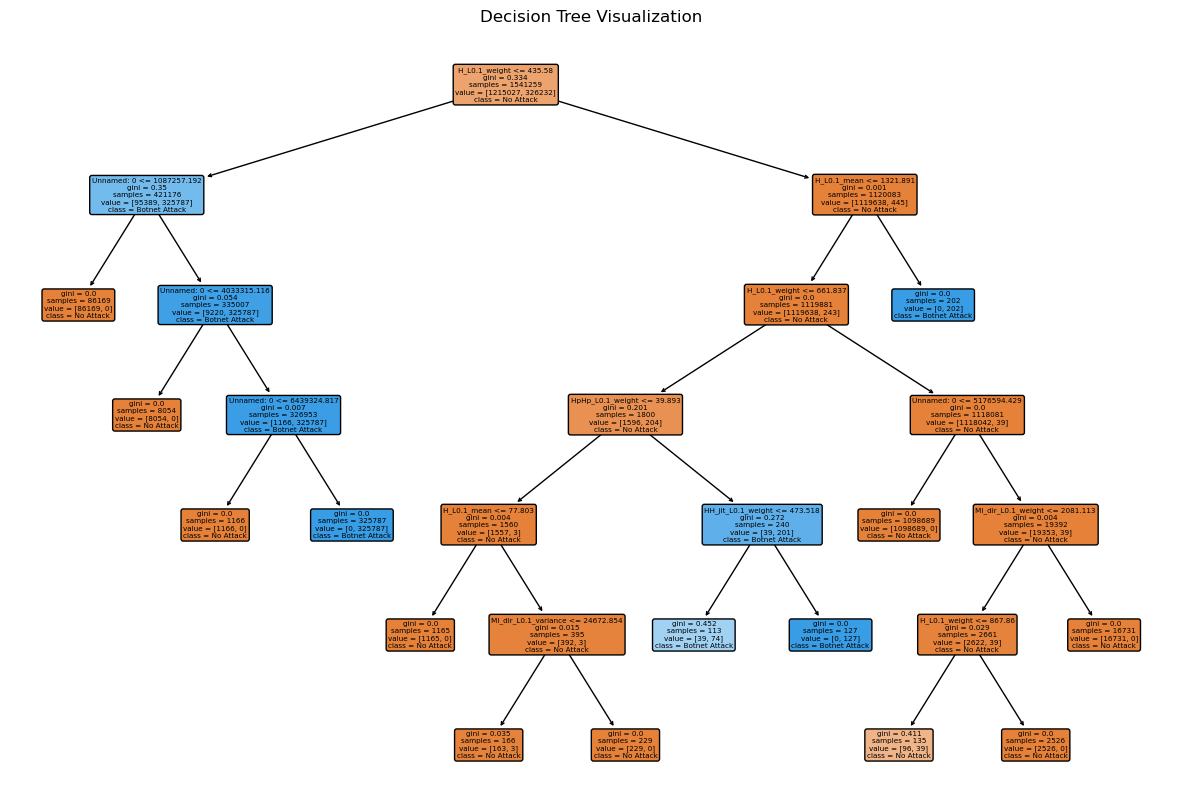

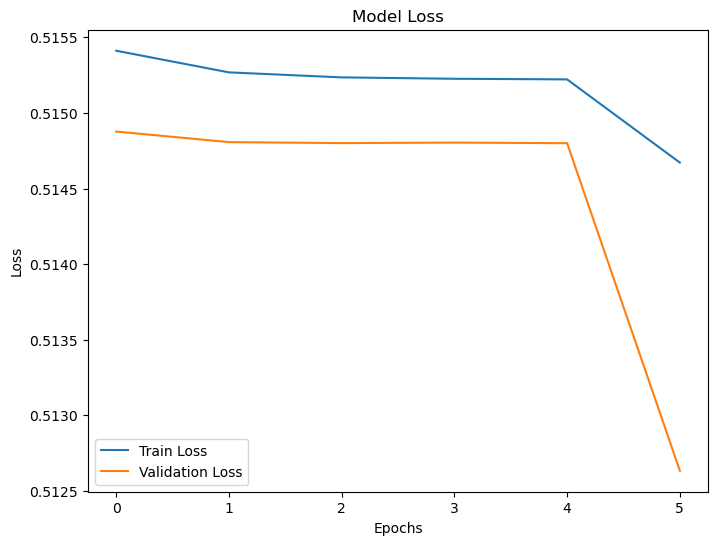

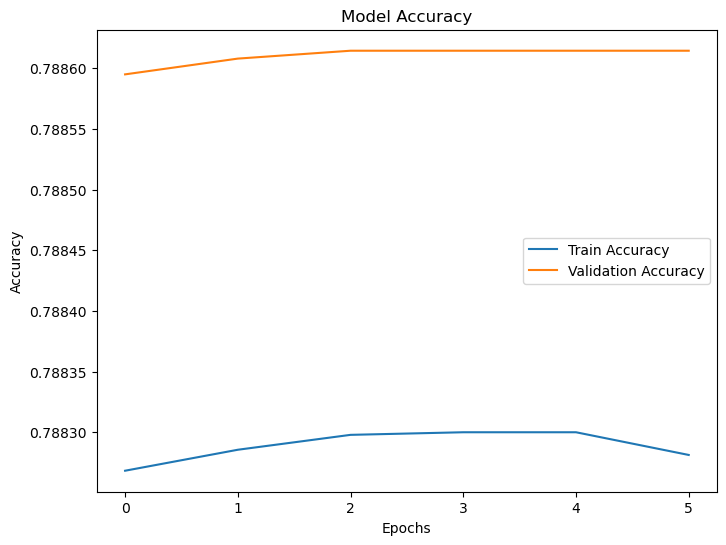

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Train-Test Split for df1
x_train, x_test, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=0)

# Create and train the Decision Tree Classifier
cart = DecisionTreeClassifier(
    max_depth=3, 
    min_samples_split=300, 
    min_samples_leaf=200,
    random_state=42,
    splitter="random" 
)
cart.fit(x_train, y_train)

# Test the model on df2
y_pred = cart.predict(df2)

# Calculate metrics
accuracy = accuracy_score(Y2, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y2, y_pred, average='binary')

print('Decision Tree Classifier Results:')
print('Test Accuracy: {:.5f}%'.format(accuracy * 100))
print('Test Precision: {:.5f}'.format(precision))
print('Test Recall: {:.5f}'.format(recall))
print('Test F score: {:.5f}\n'.format(f1_score))

# Plotting Confusion Matrix
cm = confusion_matrix(Y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting Feature Importances
feature_importances = cart.feature_importances_
features = x_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()

# Plotting ROC Curve
# Assuming you have the y_probs variable calculated already:
y_probs = cart.predict_proba(df2)[:, 1]

fpr, tpr, thresholds = roc_curve(Y2, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(Y2, y_probs):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plotting Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(cart, filled=True, feature_names=list(df1.columns), class_names=['No Attack', 'Botnet Attack'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()




# Plotting Neural Network Loss and Accuracy
# Assuming you have an annmodel trained and history variable available:
history = annmodel.fit(x_train, y_train, epochs=6, batch_size=1024, validation_split=0.1, verbose=0)

# Model Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Model Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Random Forest Classifier

Random Forest Classifier Results:
Test Accuracy: 99.99980%
Test Precision: 1.00000
Test Recall: 0.99999
Test F score: 1.00000



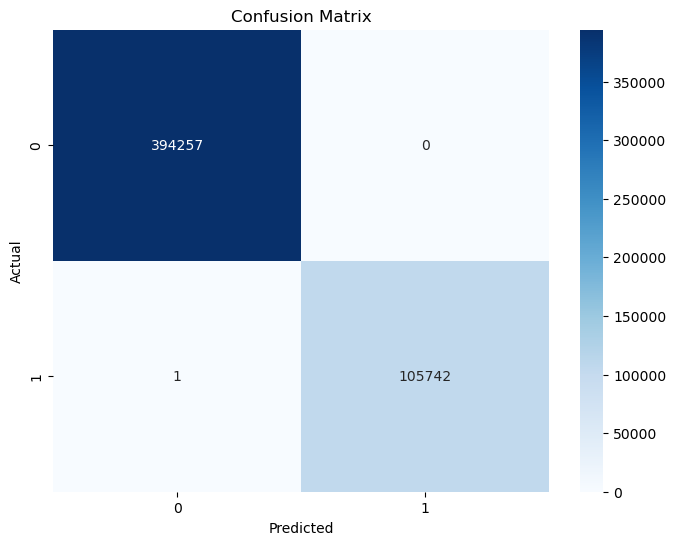

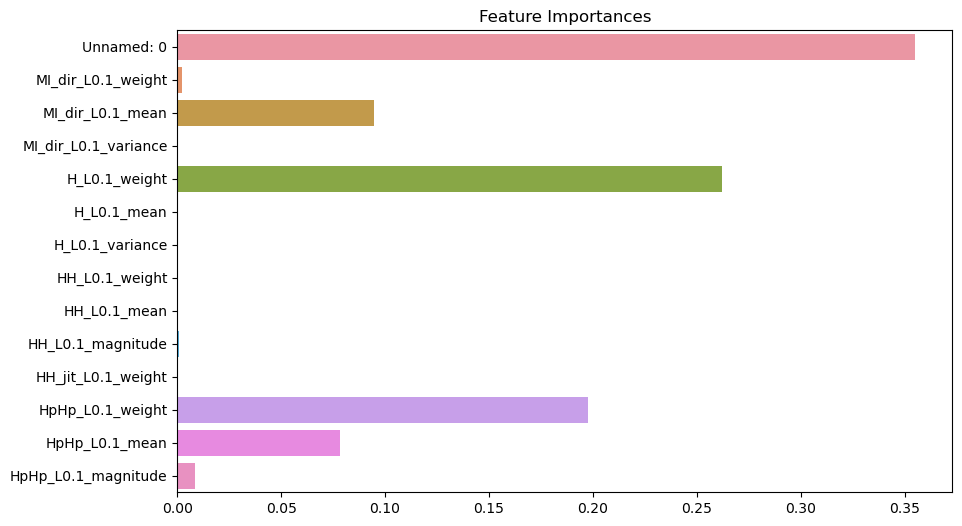

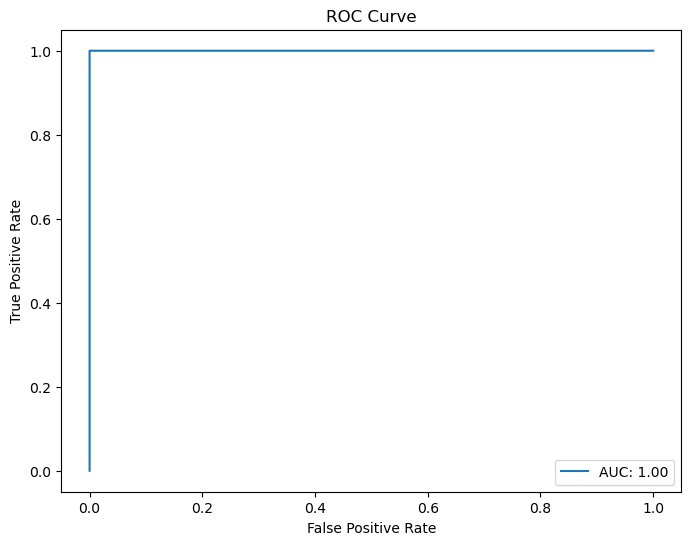

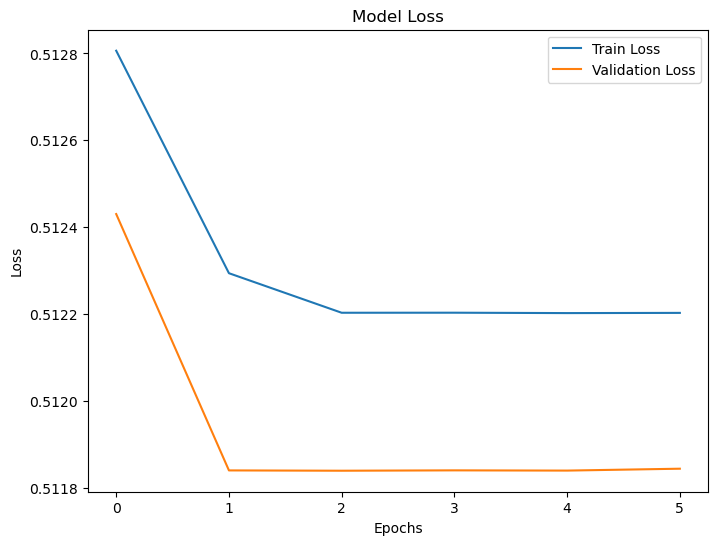

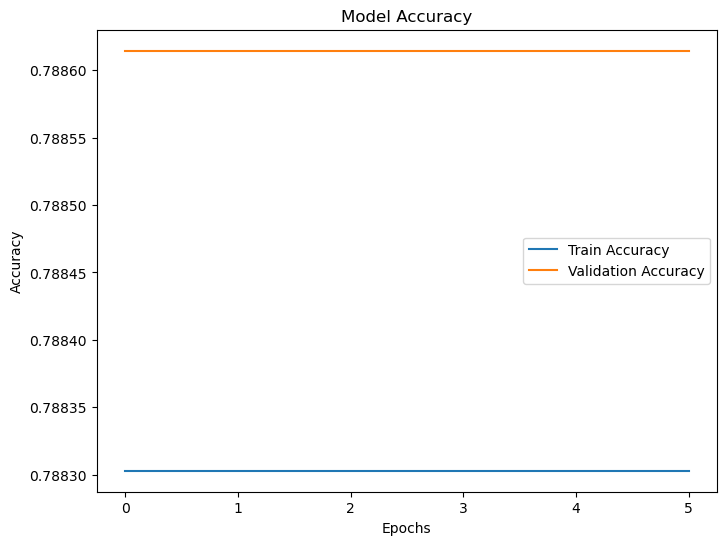

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


# Train-Test Split for df1
x_train, x_test, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=0)

# Create and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(
    n_estimators=3,
    max_depth=5,
    min_samples_split=30,
    min_samples_leaf=4,
    bootstrap=True,
    random_state=42
)
random_forest_model.fit(x_train, y_train)

# Test the model on df2
y_pred = random_forest_model.predict(df2)

# Calculate metrics
accuracy = accuracy_score(Y2, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y2, y_pred, average='binary')

print('Random Forest Classifier Results:')
print('Test Accuracy: {:.5f}%'.format(accuracy * 100))
print('Test Precision: {:.5f}'.format(precision))
print('Test Recall: {:.5f}'.format(recall))
print('Test F score: {:.5f}\n'.format(f1_score))

# Plotting Confusion Matrix
cm = confusion_matrix(Y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plotting Feature Importances
feature_importances = random_forest_model.feature_importances_
features = x_train.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()

# Plotting ROC Curve
# Calculate predicted probabilities for df2 using predict_proba
y_probs = random_forest_model.predict_proba(df2)[:, 1]

fpr, tpr, thresholds = roc_curve(Y2, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(Y2, y_probs):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plotting Neural Network Loss and Accuracy
# Assuming you have an annmodel trained and history variable available:
history = annmodel.fit(x_train, y_train, epochs=6, batch_size=1024, validation_split=0.1, verbose=0)

# Model Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Model Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [28]:
# evaluate a weighted average ensemble for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score


# Split df1 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=0, stratify=Y1)

def get_models():
    models = list()
    models.append(('gb', GradientBoostingClassifier(n_estimators=3, learning_rate=0.1, max_features=1, max_depth=1, random_state=42)))
    models.append(('cart', DecisionTreeClassifier()))
   # annmodel = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
   # models.append(('ann', annmodel))
    models.append(('RF', RandomForestClassifier(n_estimators=100, max_depth=1, min_samples_split=10, min_samples_leaf=3, bootstrap=True, random_state=42)))
    return models

# Evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
    # Fit and evaluate the models
    scores = list()
    for name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model
        yhat = model.predict(X_val)
        acc = accuracy_score(y_val, yhat)
        # Store the performance
        scores.append(acc)
        # Report model performance
    return scores

models = get_models()
# Fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)

# Create the ensemble
ensemble = VotingClassifier(estimators=models, voting='hard', weights=scores)

# Fit the ensemble on the training dataset
ensemble.fit(X_train, y_train)

# Make predictions on test set
y_pred = ensemble.predict(df2)

# Evaluate the ensemble on df2 and Y2
print("Accuracy:", accuracy_score(Y2, y_pred))
print('Precision', precision_score(Y2, y_pred, average='macro'))
print('Recall', recall_score(Y2, y_pred, average='macro'))
print('F score', f1_score(Y2, y_pred, average='macro'))


Accuracy: 1.0
Precision 1.0
Recall 1.0
F score 1.0


Ensemble Accuracy: 1.0
Ensemble Precision 1.0
Ensemble Recall 1.0
Ensemble F score 1.0


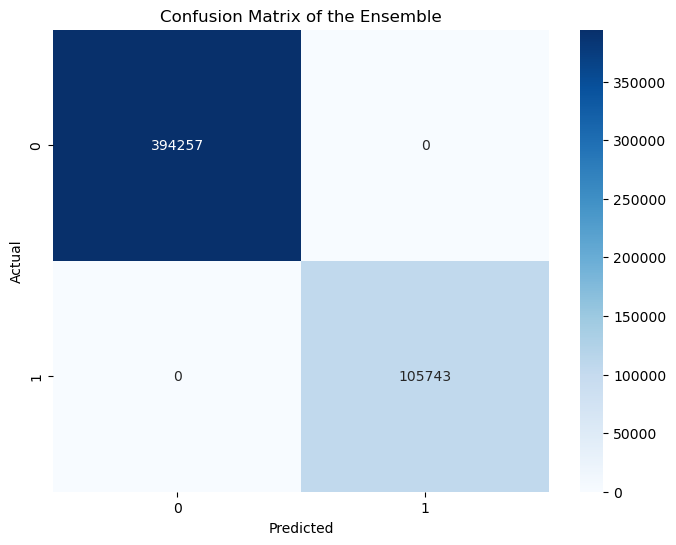

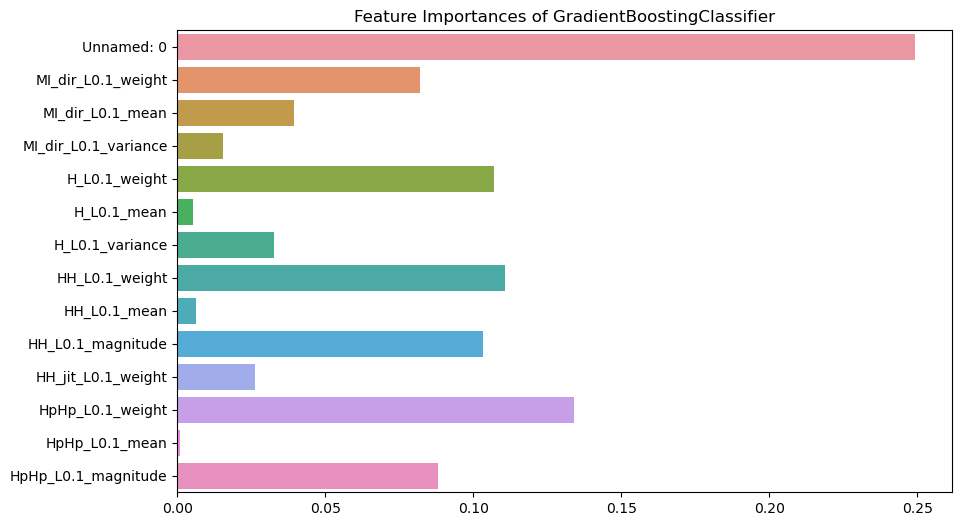

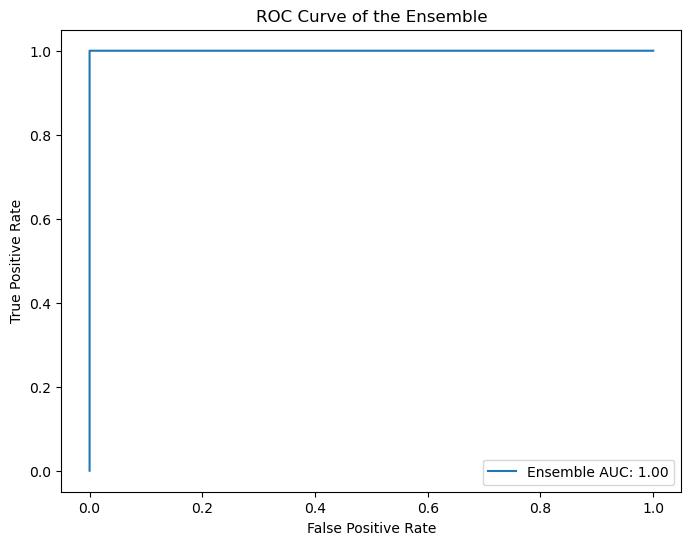

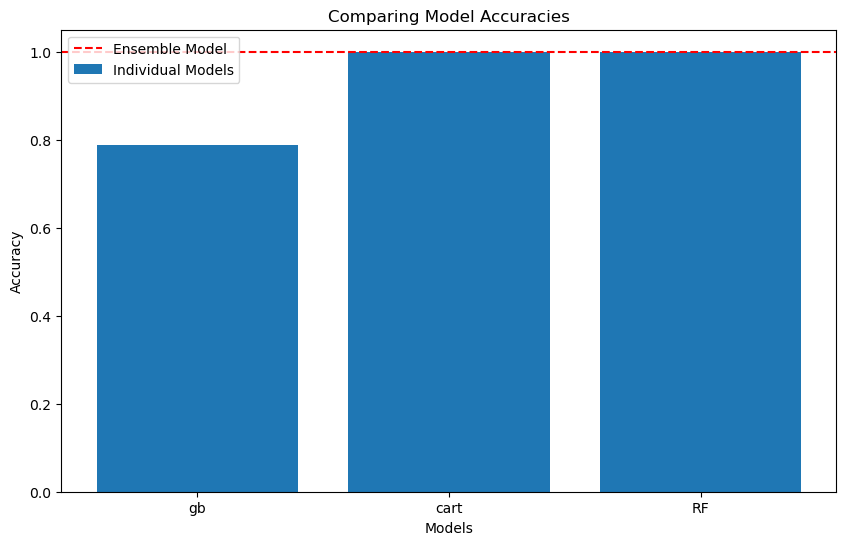

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
from sklearn import metrics

# ... [Your code remains unchanged till ensemble model fit] ...

# Split df1 into training and testing sets
X_train_mi, X_test_mi, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=42, stratify=Y1)

# Evaluate ensemble on df2 and Y2
y_pred = ensemble.predict(df2)
print("Ensemble Accuracy:", metrics.accuracy_score(Y2, y_pred))
print('Ensemble Precision', metrics.precision_score(Y2, y_pred, average='macro'))
print('Ensemble Recall', metrics.recall_score(Y2, y_pred, average='macro'))
print('Ensemble F score', metrics.f1_score(Y2, y_pred, average='macro'))

# Plotting Confusion Matrix
cm = confusion_matrix(Y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Ensemble')
plt.show()

# Assuming 'gb' is the GradientBoostingClassifier in the models list
gb = [model for name, model in models if name == 'gb'][0]
feature_importances = gb.feature_importances_
features = X_train_mi.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances of GradientBoostingClassifier')
plt.show()

# Assuming you have y_probs available for the ensemble model
fpr, tpr, thresholds = roc_curve(Y2, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Ensemble AUC: {roc_auc_score(Y2, y_probs):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Ensemble')
plt.legend()
plt.show()





# Additional visualization to compare model accuracies
model_names = [name for name, _ in models]
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, label='Individual Models')
plt.axhline(y=metrics.accuracy_score(Y2, y_pred), color='r', linestyle='--', label='Ensemble Model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Model Accuracies')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
from sklearn import metrics

# ... [Your code remains unchanged till ensemble model fit] ...

# Split df1 into training and testing sets
X_train_mi, X_test_mi, y_train, y_test = train_test_split(df1, Y1, test_size=0.2, random_state=0, stratify=Y1)

# Evaluate ensemble on df2 and Y2
y_pred = ensemble.predict(df2)
print("Ensemble Accuracy:", metrics.accuracy_score(Y2, y_pred))
print('Ensemble Precision', metrics.precision_score(Y2, y_pred, average='macro'))
print('Ensemble Recall', metrics.recall_score(Y2, y_pred, average='macro'))
print('Ensemble F score', metrics.f1_score(Y2, y_pred, average='macro'))

# Plotting Confusion Matrix
cm = confusion_matrix(Y2, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Ensemble')
plt.show()

# Assuming 'gb' is the GradientBoostingClassifier in the models list
gb = [model for name, model in models if name == 'gb'][0]
feature_importances = gb.feature_importances_
features = X_train_mi.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances of GradientBoostingClassifier')
plt.show()

# Assuming you have y_probs available for the ensemble model
fpr, tpr, thresholds = roc_curve(Y2, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Ensemble AUC: {roc_auc_score(Y2, y_probs):.2f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Ensemble')
plt.legend()
plt.show()

# Assuming 'ann' is the MLPClassifier in the models list
# annmodel = [model for name, model in models if name == 'ann'][0]
# history = annmodel.fit(X_train_mi, y_train)

# # Neural Network Loss
# plt.figure(figsize=(8, 6))
# plt.plot(history.loss_curve_, label='Train Loss')
# plt.title('Model Loss of the Neural Network')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend()
# plt.show()

# # Neural Network Accuracy
# plt.figure(figsize=(8, 6))
# plt.plot(history.score(X_train_mi, y_train), label='Train Accuracy')
# plt.plot(history.score(X_test_mi, y_test), label='Validation Accuracy')
# plt.title('Model Accuracy of the Neural Network')
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
# plt.legend()
# plt.show()

# Additional visualization to compare model accuracies
model_names = [name for name, _ in models]
plt.figure(figsize=(10, 6))
plt.bar(model_names, scores, label='Individual Models')
plt.axhline(y=metrics.accuracy_score(Y2, y_pred), color='r', linestyle='--', label='Ensemble Model')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparing Model Accuracies')
plt.legend()
plt.show()


In [ ]:
# Evaluate a weighted average ensemble for classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split dataset into train and test sets
X_train_mi, X_test_mi, y_train, y_testset = train_test_split(df1, Y1, test_size=0.2, random_state=0, stratify=Y)

# Get a list of base models
def get_models():
    models = list()
    models.append(('GB', GradientBoostingClassifier(n_estimators=3, learning_rate=0.1, max_features=1, max_depth=1, random_state=42)))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier(n_estimators=100, max_depth=1, min_samples_split=10, min_samples_leaf=3, bootstrap=True, random_state=42)))

    return models

# Evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
    scores = list()
    for name, model in models:
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model
        yhat = model.predict(X_val)
        acc = accuracy_score(y_val, yhat)
        # Store the performance
        scores.append(acc)
    return scores

# Create the base models
models = get_models()

# Fit and evaluate each model
scores = evaluate_models(models, X_train_mi, X_test_mi, y_train, y_testset)

# Create the ensemble
ensemble = VotingClassifier(estimators=models, voting='hard', weights=scores)

# Fit the ensemble on the training dataset
ensemble.fit(X_train_mi, y_train)

# Make predictions on test set
y_pred = ensemble.predict(X_test_mi)

# Calculate evaluation metrics
acc_value = accuracy_score(y_testset, y_pred)
precision_value = precision_score(y_testset, y_pred, average='macro')
recall_value = recall_score(y_testset, y_pred, average='macro')
f1_score_value = f1_score(y_testset, y_pred, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_testset, y_pred))
print('Precision', precision_score(y_testset, y_pred, average='macro'))
print('Recall', recall_score(y_testset, y_pred, average='macro'))
print('F score', f1_score(y_testset, y_pred, average='macro'))

# Define a figure to hold the subplots
plt.figure(figsize=(12, 4)) 

# Filter out instances with label '2' from y_testset
mask = y_testset.isin([0, 1])
filtered_y_test = y_testset[mask]
filtered_y_pred = y_pred[mask]

# First subplot: Bar chart of metrics
plt.subplot(1, 2, 1) 
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F score']
metrics_values = [acc_value, precision_value, recall_value, f1_score_value]
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'red', 'purple'])
for i, v in enumerate(metrics_values):
    plt.text(i, v + 0.01, '{:.2f}'.format(v), ha='center')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1.2)
plt.ylabel('Score')


# Second subplot: Confusion Matrix
plt.subplot(1, 2, 2)  
cm = confusion_matrix(filtered_y_test, filtered_y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


# Display the plots
plt.tight_layout() 
plt.show()
